# first Milestone:
**(1.Data Collection - 2.Data Exploration - 3.Data Processing - 4.EDA (Exploratory Data Analysis))**


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
from Data_helper import *

In [2]:
pd.options.mode.copy_on_write = True 

## 1. Data Collection

In [3]:
data = pd.read_csv(r"Data/train.csv")

In [4]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## 2. Data Exploration

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
data.shape

(9800, 18)

In [7]:
data.ndim

2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [10]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [12]:
print(len(data.Country.unique()))
print(data.Country.unique())


1
['United States']


In [13]:
print(len(data.Category.unique()))
print(data.Category.unique())
print(data['Category'].value_counts())

3
['Furniture' 'Office Supplies' 'Technology']
Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


In [14]:
print(data['Sub-Category'].value_counts())

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


In [15]:
print(data['Ship Mode'].value_counts())

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


In [16]:
print(len(data.Segment.unique()))
print(data.Segment.unique())
print(data['Segment'].value_counts())

3
['Consumer' 'Corporate' 'Home Office']
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


In [17]:
category_dict = data.groupby("Category")["Sub-Category"].unique().to_dict()

for cat, subs in category_dict.items():
    print(f"{cat}: {', '.join(subs)}")


Furniture: Bookcases, Chairs, Tables, Furnishings
Office Supplies: Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies
Technology: Phones, Accessories, Machines, Copiers


In [18]:
print(len(data.State.unique()))
print(data.State.unique())

49
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


## 3. Data Processing
1. **Missing values**

In [19]:
#Missing values:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [20]:
data.loc[data['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [21]:
data.loc[data['City']=='Burlington']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [22]:
data.loc[data['State']=='Vermont']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


- We notice that all rows of Vermont state has no postal code.
- Vermont ZIP Codes is the range from 05001 to 05907. This state is located in United States of America (USA), North America.
- So lets fill postal code with one of these values

In [23]:
# Initialize our preprocessing class
Data_manager = Preprocessing_Pipeline(data)

#First we change postal codes to object 
data = Data_manager.change_to_obj('Postal Code')

data = Data_manager.handle_na('Postal Code',value_to_add='05401')

data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

2. **Outliers**

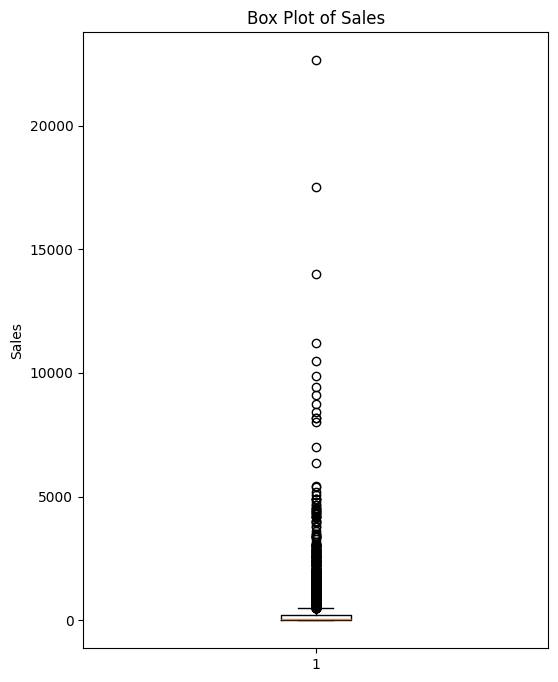

In [24]:
#Manage outliers
plt.figure(figsize=(6, 8))
plt.boxplot(data['Sales'], vert=True)
plt.title("Box Plot of Sales")
plt.ylabel("Sales")
plt.show()

In [25]:
data['Sales'].skew()

np.float64(12.983482865034619)

In [26]:
data = Data_manager.handle_outliers('Sales',log_transform=True)

data['log_scaled_Sales'].skew()

np.float64(-0.0019661435195849632)

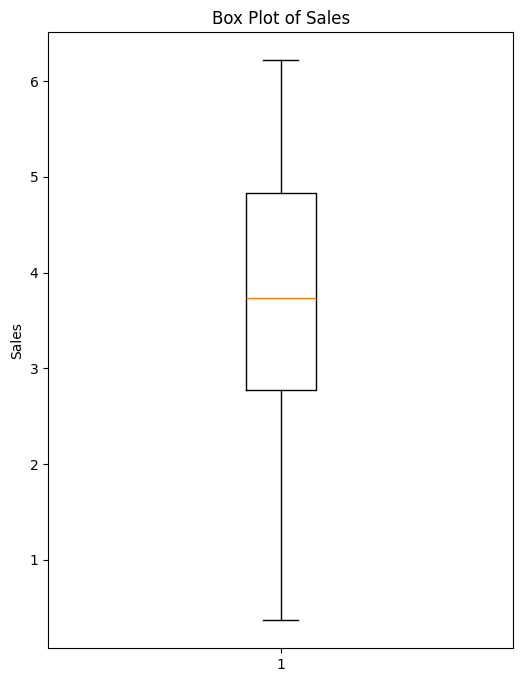

In [27]:
#Manage outliers
plt.figure(figsize=(6, 8))
plt.boxplot(data['log_scaled_Sales'], vert=True)
plt.title("Box Plot of Sales")
plt.ylabel("Sales")
plt.show()

3. **Create Time based features**

C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\3109699357.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="season", y="Sales", palette="hot", ax=ax1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\3109699357.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="dayofweek", y="Sales", palette="magma", ax=ax2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\3109699357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="dayofyear_bin", y="Sales", palette="magma", ax=ax3)
C:

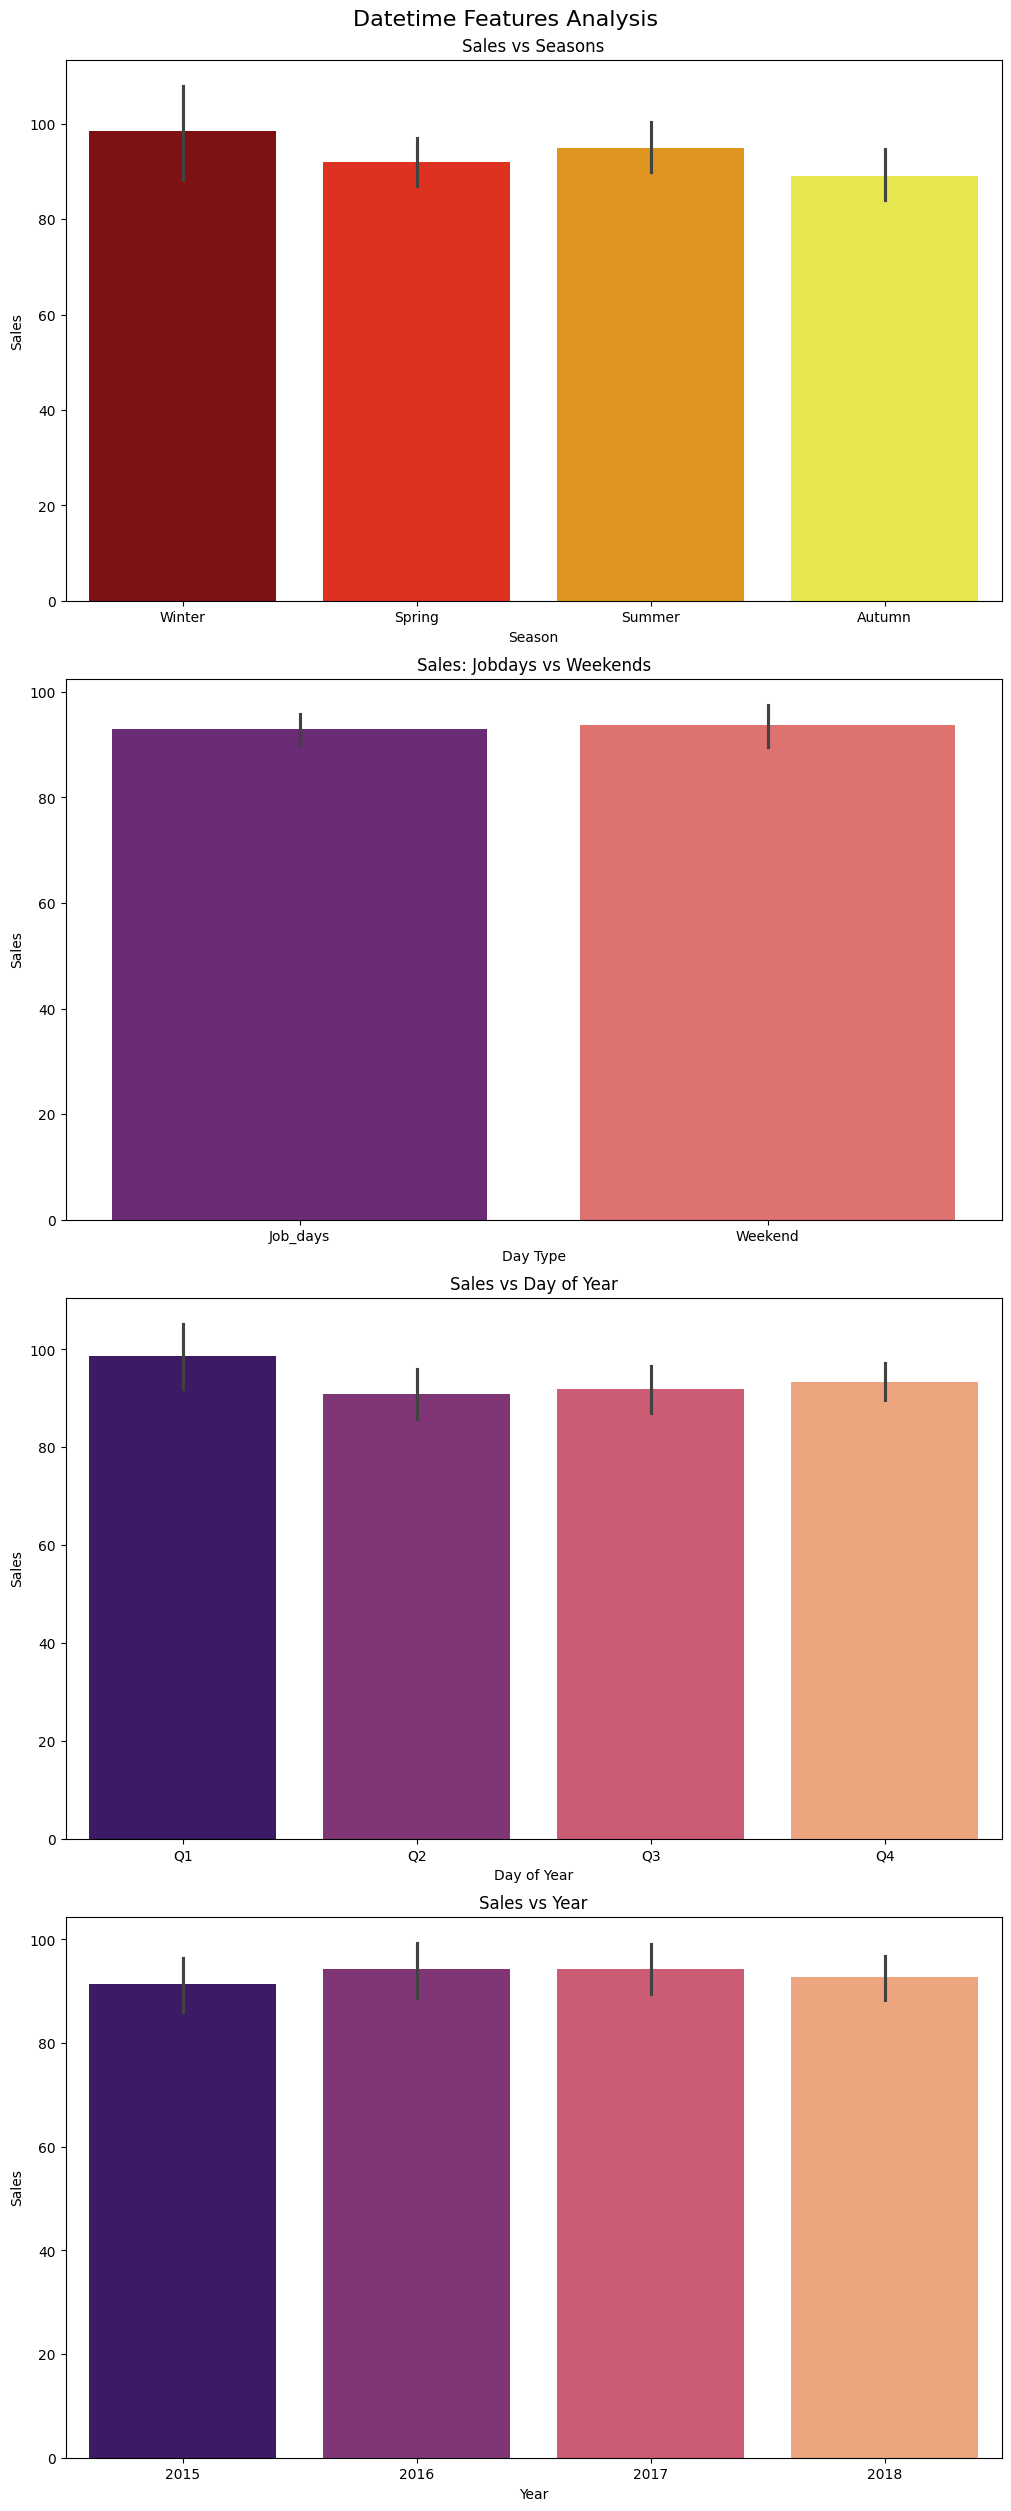

In [28]:
data = Data_manager.change_to_date('Order Date')

data = Data_manager.create_Time_Based_features()

# --- Plotting ---
fig = plt.figure(constrained_layout=True, figsize=(10, 25))
gs = GridSpec(4, 1, figure=fig)

# 1. Sales vs Seasons
ax1 = fig.add_subplot(gs[0, :])
sns.barplot(data=data, x="season", y="Sales", palette="hot", ax=ax1)
ax1.set_title("Sales vs Seasons")
ax1.set_xlabel("Season")
ax1.set_ylabel("Sales")

# 2. Sales vs Jobday/Weekend
ax2 = fig.add_subplot(gs[1, :])
sns.barplot(data=data, x="dayofweek", y="Sales", palette="magma", ax=ax2)
ax2.set_title("Sales: Jobdays vs Weekends")
ax2.set_xlabel("Day Type")
ax2.set_ylabel("Sales")

# 3. Sales vs Day of Year
ax3 = fig.add_subplot(gs[2, :])
sns.barplot(data=data, x="dayofyear_bin", y="Sales", palette="magma", ax=ax3)
ax3.set_title("Sales vs Day of Year")
ax3.set_xlabel("Day of Year")
ax3.set_ylabel("Sales")

# 4. Sales vs Years
ax3 = fig.add_subplot(gs[3, :])
sns.barplot(data=data, x="year", y="Sales", palette="magma", ax=ax3)
ax3.set_title("Sales vs Year")
ax3.set_xlabel("Year")
ax3.set_ylabel("Sales")

# Overall title
fig.suptitle("Datetime Features Analysis", fontsize=16)

plt.show()


In [29]:
data= data.sort_values(by="Order Date", ascending=True).reset_index(drop=True)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,log_scaled_Sales,dayofweek,day,dayofyear_bin,month,season,year
0,7981,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.859225,Weekend,3,Q1,1,Winter,2015
1,740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Labels,Avery 508,11.784,2.548194,Weekend,4,Q1,1,Winter,2015
2,741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Storage,SAFCO Boltless Steel Shelving,272.736,5.612164,Weekend,4,Q1,1,Winter,2015
3,742,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1.512927,Weekend,4,Q1,1,Winter,2015
4,1760,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.022179,Job_days,5,Q1,1,Winter,2015


In [30]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,log_scaled_Sales,dayofweek,day,dayofyear_bin,month,season,year
8650,1297,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.701630,Weekend,30,Q4,12,NaN,2018
8651,5092,CA-2018-156720,2018-12-30,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Fasteners,Bagged Rubber Bands,3.024,1.392276,Weekend,30,Q4,12,NaN,2018
8652,1298,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Binders,GBC Binding covers,20.720,3.078233,Weekend,30,Q4,12,NaN,2018
8653,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Binders,Wilson Jones Legal Size Ring Binders,52.776,3.984827,Weekend,30,Q4,12,NaN,2018
8654,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,5.348535,Weekend,30,Q4,12,NaN,2018


## 4. EDA (Exploratory Data Analysis)

In [31]:
# ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
#        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
#        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
#        'Product Name', 'Sales'],

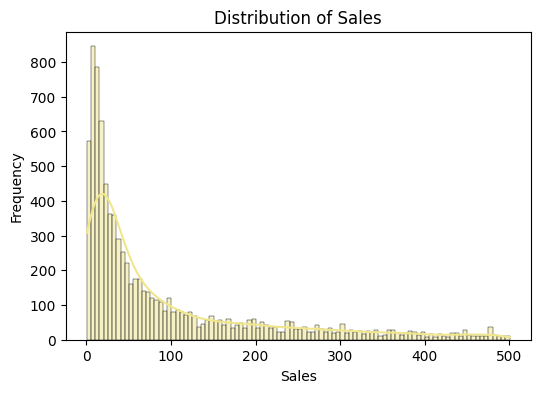

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(data['Sales'], bins=100, kde=True ,color='Khaki')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

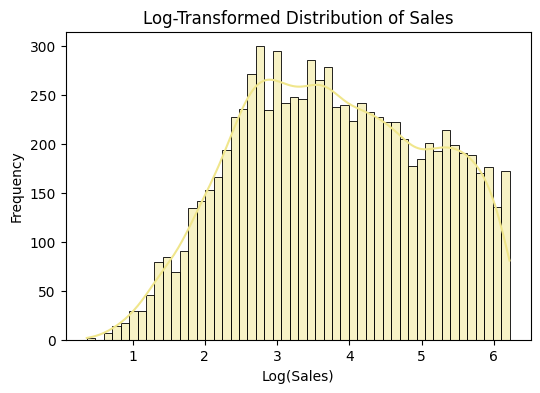

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(data['Sales']), bins=50, kde=True, color="khaki")
plt.title("Log-Transformed Distribution of Sales")
plt.xlabel("Log(Sales)")
plt.ylabel("Frequency")
plt.show()


Text(0.5, 1.0, 'Category pie chart')

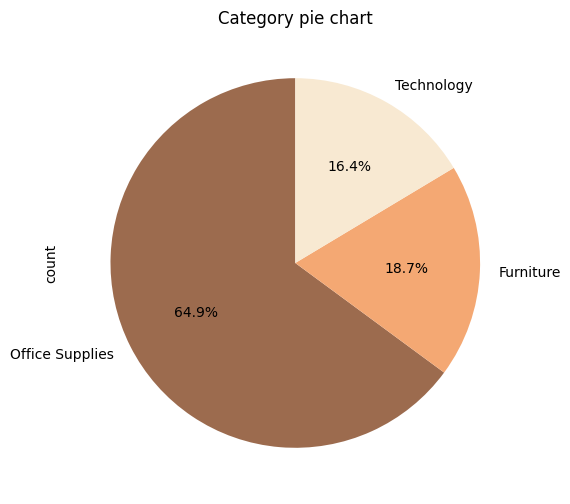

In [34]:
plt.figure(figsize=(8,6))
data["Category"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=('#9c6b4e','#f4a873','#f8e9d2'))
plt.title("Category pie chart")

Text(0.5, 1.0, 'Ship Mode pie chart')

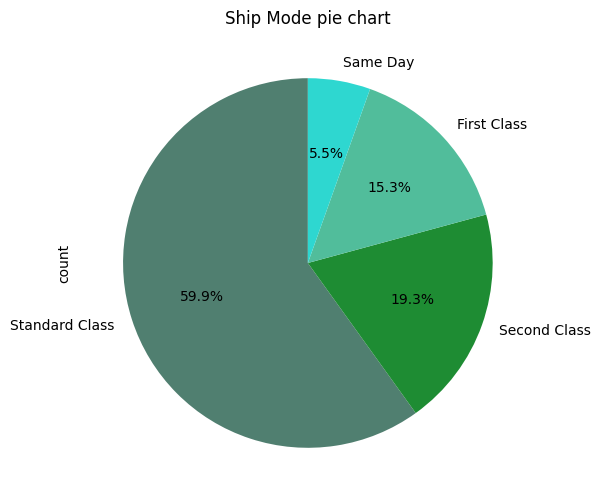

In [35]:
plt.figure(figsize=(8,6))
data["Ship Mode"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=('#507f70','#1e8c33','#51bd9b','#2ed7d0'))
plt.title("Ship Mode pie chart")

Text(0.5, 1.0, 'Segment pie chart')

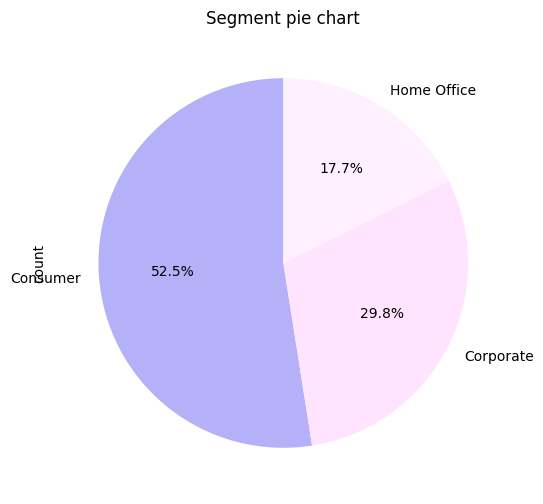

In [36]:
plt.figure(figsize=(8,6))
data["Segment"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=('#b4b1f8','#ffe3ff','#fff0ff'))
plt.title("Segment pie chart")

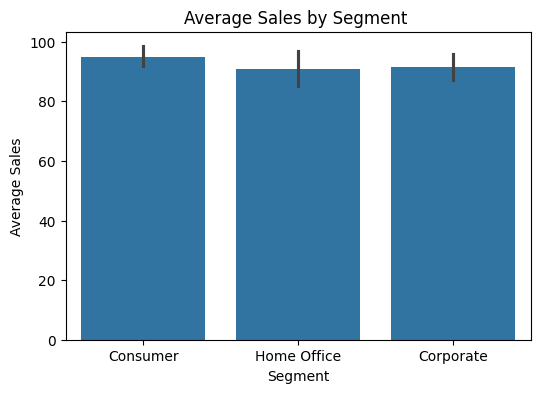

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x='Segment', y='Sales', data=data)
plt.title("Average Sales by Segment ")
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.show()

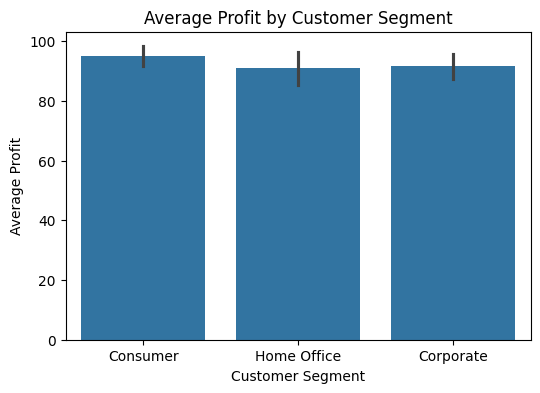

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x='Segment', y='Sales', data=data)
plt.title("Average Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Profit")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\990299499.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='Sales', data=data, estimator=sum, ci=None)


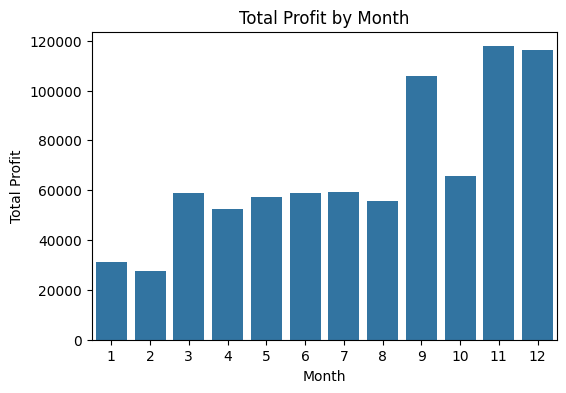

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x='month', y='Sales', data=data, estimator=sum, ci=None)
plt.title("Total Profit by Month")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()

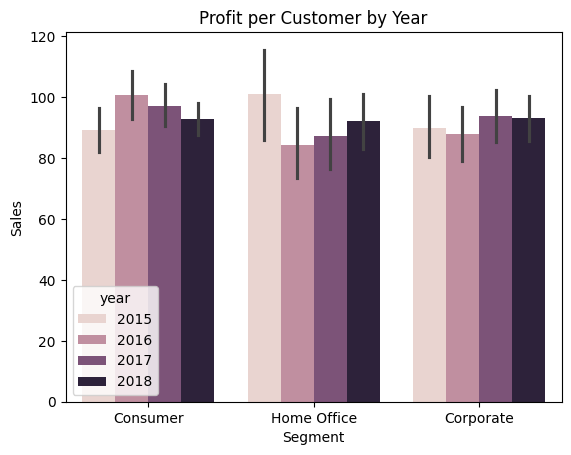

In [40]:
sns.barplot(x='Segment', y='Sales', hue='year', data=data)
plt.title("Profit per Customer by Year")
plt.show()

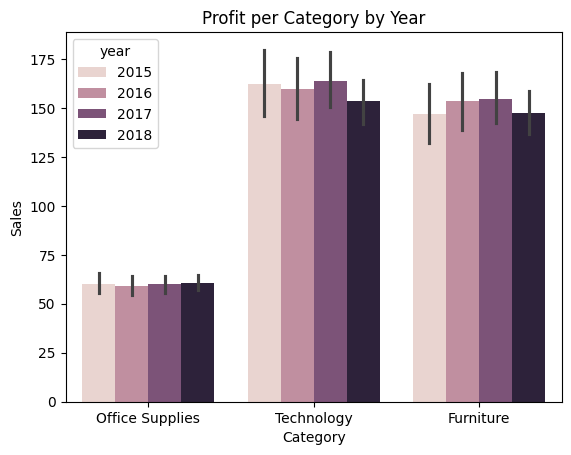

In [41]:
sns.barplot(x='Category', y='Sales', hue='year', data=data )
plt.title("Profit per Category by Year")
plt.show()


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


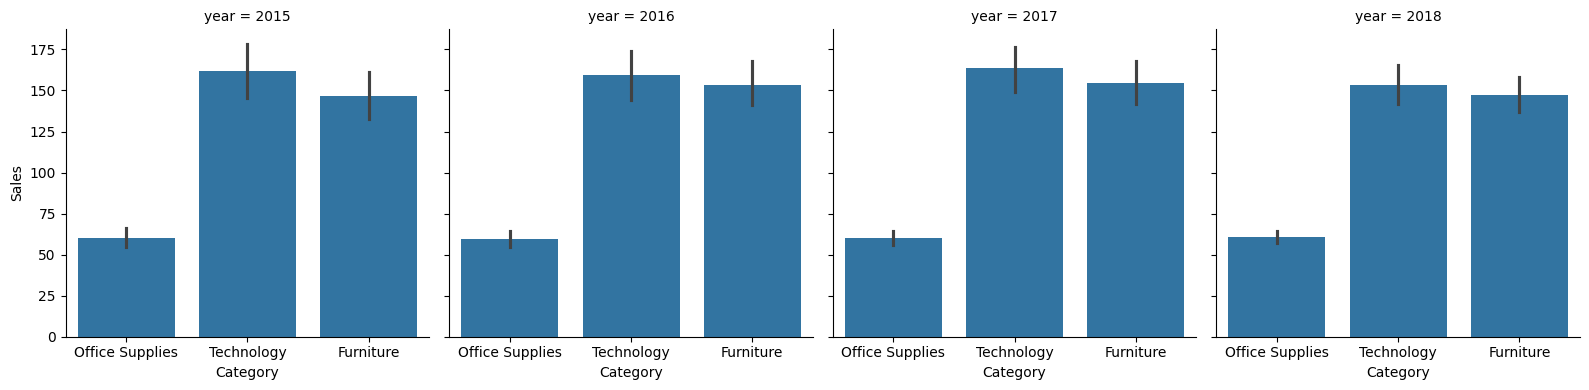

In [42]:
g = sns.FacetGrid(data, col='year', height=4)
g.map(sns.barplot, 'Category', 'Sales')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\913243385.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='Sales', hue='Category', data=data, estimator=sum, ci=None)


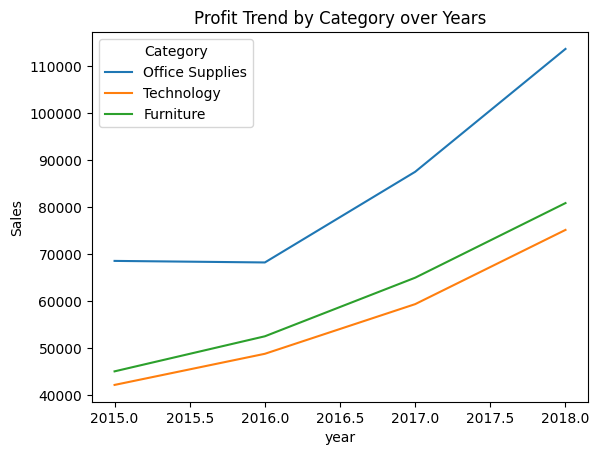

In [43]:
sns.lineplot(x='year', y='Sales', hue='Category', data=data, estimator=sum, ci=None)
plt.title("Profit Trend by Category over Years")
plt.show()


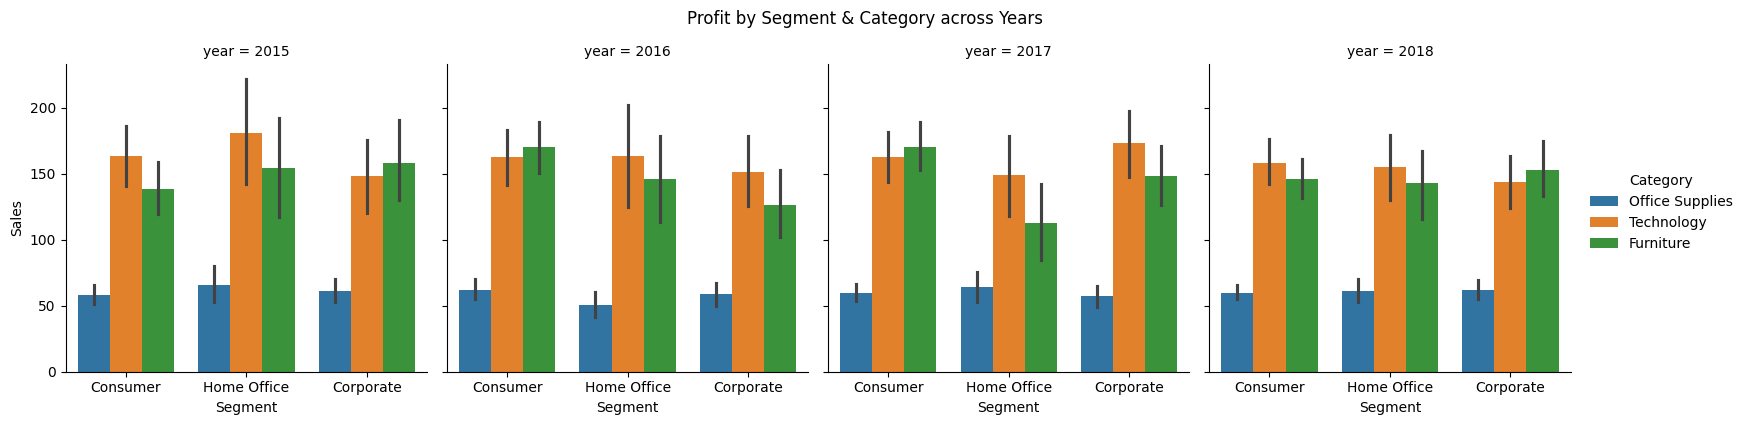

In [44]:

g = sns.catplot(
    x="Segment", y="Sales", 
    hue="Category", col="year",
    data=data, kind="bar", height=4, aspect=1
)
g.fig.suptitle("Profit by Segment & Category across Years", y=1.05)
plt.show()


## Mile Stone 2

**Feature engineering**

In [45]:
data = Data_manager.add_lag_features()

# data = Data_manager.scaling_encoding()

ACF and PACF plots for Sales 

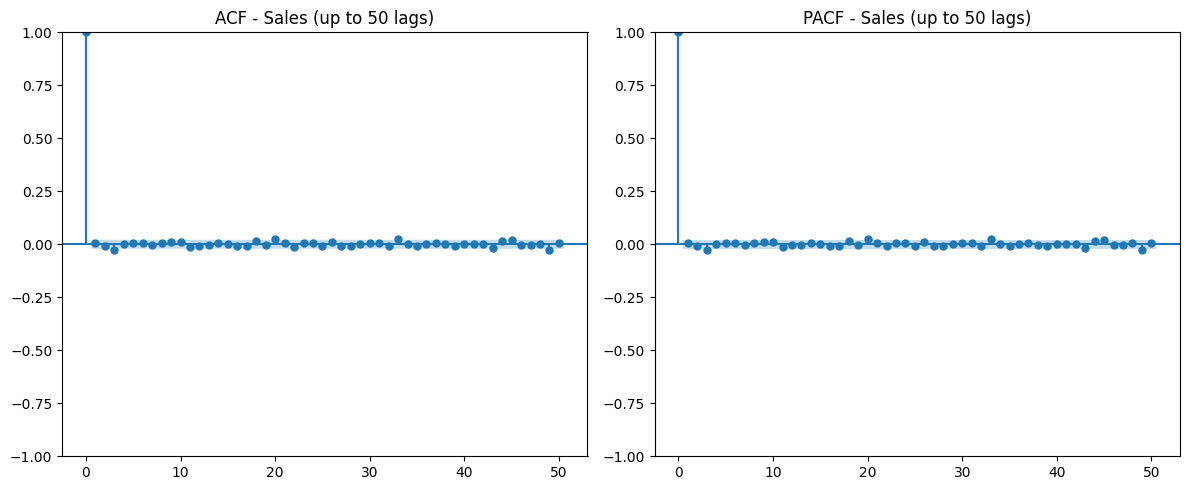

Top ACF values:
0     1.000000
1     0.006338
2    -0.007357
3    -0.024903
4     0.000040
5     0.005384
6     0.005298
7    -0.003245
8     0.004606
9     0.010230
10    0.010402
11   -0.013744
12   -0.005850
13   -0.002756
14    0.005335
15    0.002923
16   -0.007954
17   -0.008054
18    0.015029
19   -0.001695
20    0.025109
21    0.005840
22   -0.010483
23    0.004533
24    0.005378
25   -0.008810
26    0.010731
27   -0.009755
28   -0.005903
29    0.001828
30    0.006260
dtype: float64

Top PACF values:
0     1.000000
1     0.006339
2    -0.007399
3    -0.024820
4     0.000299
5     0.005026
6     0.004625
7    -0.003229
8     0.004983
9     0.010388
10    0.010175
11   -0.013568
12   -0.005032
13   -0.002398
14    0.004462
15    0.002383
16   -0.007992
17   -0.007537
18    0.014997
19   -0.002526
20    0.025182
21    0.006760
22   -0.010248
23    0.005675
24    0.005142
25   -0.009235
26    0.011193
27   -0.009933
28   -0.006821
29    0.001909
30    0.005340
dtype: float64


In [46]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

series = data['Sales'].dropna()

plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
plot_acf(series, lags=50, ax=ax)
ax.set_title('ACF - Sales (up to 50 lags)')

ax = plt.subplot(1,2,2)
plot_pacf(series, lags=50, ax=ax, method='ywm')
ax.set_title('PACF - Sales (up to 50 lags)')

plt.tight_layout()
plt.show()

# few numerical ACF/PACF values to help choose lags
num_lags = 30
print('Top ACF values:')
print(pd.Series(acf(series, nlags=num_lags)).head(num_lags+1))
print('\nTop PACF values:')
print(pd.Series(pacf(series, nlags=num_lags)).head(num_lags+1))

# Advanced Visualization

In [47]:
# 1 — Sales Over Time
fig = px.line(data, x="Order Date", y="Sales", color="Category",
              title=" Sales Over Time by Category")
fig.show()


In [48]:
# 2 — Profitability by Season (using Sales)
fig = px.bar(
    data.groupby("season")["Sales"].sum().reset_index(),
    x="season", y="Sales", color="season",
    title=" Sales Distribution by Season"
)
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\2525961330.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [49]:
#3 — Top Category per Season
season_category_sales = data.groupby(["season","Category"])["Sales"].sum().reset_index()
top_sales_each_season = season_category_sales.loc[season_category_sales.groupby("season")["Sales"].idxmax()]
fig = px.bar(top_sales_each_season, x="season", y="Sales", color="Category", 
             text="Category", title=" Top Category per Season")
fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\936599246.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\936599246.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [50]:
#  4 — Sales by Month & Category
fig = px.bar(data, x="month", y="Sales", color="Category", barmode="group",
             title=" Monthly Sales by Category")
fig.show()


In [51]:
# 5 — Sub-Category Heatmap by Region
sub_region = data.groupby(["Region","Category"])["Sales"].sum().reset_index()
fig = px.density_heatmap(sub_region, x="Region", y="Category", z="Sales",
                         title=" Sales Heatmap: Category vs Region")
fig.show()


In [52]:
# 6 — Category Sales Growth per Year
cat_year = data.groupby(["year","Category"])["Sales"].sum().reset_index()
fig = px.line(cat_year, x="year", y="Sales", color="Category",
              title=" Category Sales Growth Over Years")
fig.show()


In [53]:
# 7 — Sales by State (Map)

# Dictionary: Full state names -> Abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviation column
state_sales = data.groupby("State")["Sales"].sum().reset_index()
state_sales["State_abbrev"] = state_sales["State"].map(us_state_abbrev)

# Plot with abbreviations
fig = px.choropleth(
    state_sales,
    locations="State_abbrev",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    title=" Sales Distribution Across States (Fixed)"
)
fig.show()

In [54]:
# 8 — Top 10 Cities by Sales
city_sales = data.groupby("City")["Sales"].sum().nlargest(10).reset_index()
fig = px.bar(city_sales, x="City", y="Sales", title=" Top 10 Cities by Sales")
fig.show()


In [55]:
# 9 — Sales by Region/State (bar)
if 'State' in data.columns and 'Sales' in data.columns:
    state_sales = data.groupby('State', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(25)
    fig = px.bar(state_sales, x='State', y='Sales', title='Top 25 States by Sales')
    fig.update_xaxes(tickangle=45)
    fig.show()
else:
    print("Missing State or Sales")


In [56]:
# 10 — Top 15 Customers by Sales
top_cust = data.groupby('Customer Name', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(5)
fig = px.bar(top_cust.sort_values('Sales'), x='Sales', y='Customer Name',
             orientation='h', title='Top 5 Customers by Sales')
fig.show()


In [57]:
# 11— Sales Trend by Segment Across Seasons
seg_season = data.groupby(["season","Segment"])["Sales"].sum().reset_index()
fig = px.bar(seg_season, x="season", y="Sales", color="Segment", barmode="group",
             title=" Seasonal Sales by Customer Segment")
fig.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_572\625200491.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [58]:
# 12 — Sub-Category Contribution within Categories
subcat_sales = data.groupby(["Category","Sub-Category"])["Sales"].sum().reset_index()
fig = px.treemap(subcat_sales, path=["Category","Sub-Category"], values="Sales",
                 title=" Category vs Sub-Category Contribution to Sales")
fig.show()


In [59]:
# 13 — Holiday/Weekend Sales Trend
holiday_sales = data.groupby(["dayofweek","year"])["Sales"].sum().reset_index()
fig = px.line(holiday_sales, x="year", y="Sales", color="dayofweek",
              title=" Holiday vs Workday Sales Trend")
fig.show()